In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**EDA and Preprocessing**

In [2]:
dataset = pd.read_csv('Salary_Data.csv')

In [3]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
dataset.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [5]:
dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [6]:
dataset.shape

(30, 2)

In [7]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4ed5940b8>,
      dtype=object)

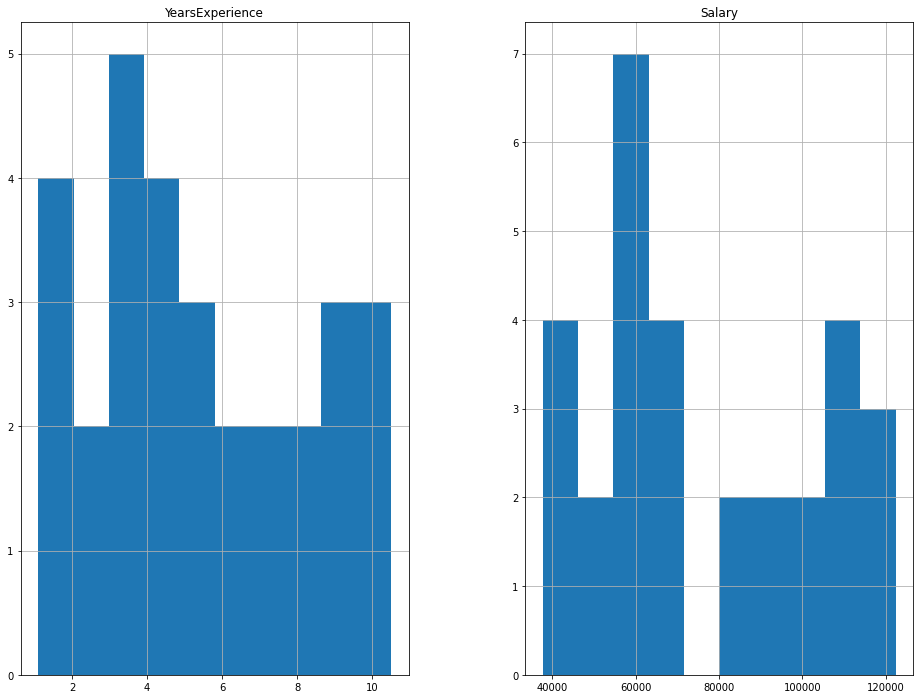

In [10]:
dataset.hist(bins=10, figsize=(16,12))

In [11]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


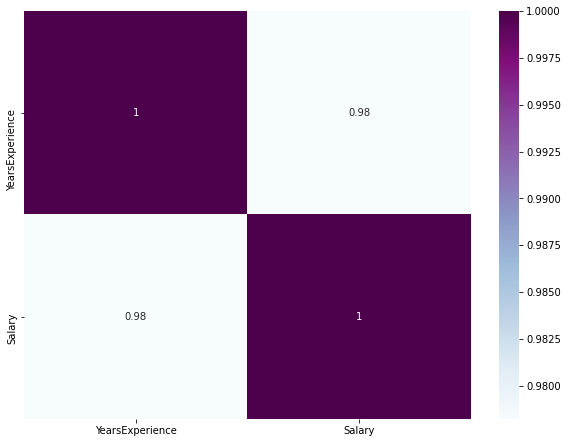

In [12]:
plt.figure(figsize=(10,7.5))
sns.heatmap(dataset.corr(), cmap = 'BuPu', annot = True)

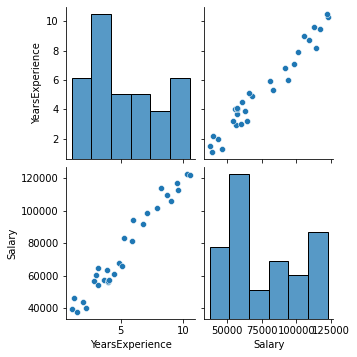

In [13]:
sns.pairplot(dataset)

**Data Preprocessing**

In [14]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =0)
print('Splitted Train-Test dataset details:')
print('Num of dataset in X -Train:', np.shape(X_train))
print('Num of dataset in Y -Train:', np.shape(y_train))
print('Num of dataset in X -Test:', np.shape(X_test))
print('Num of dataset in y -Test:', np.shape(y_test))

Splitted Train-Test dataset details:
Num of dataset in X -Train: (21, 1)
Num of dataset in Y -Train: (21,)
Num of dataset in X -Test: (9, 1)
Num of dataset in y -Test: (9,)


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [18]:
print('Explained variation: {}'.format(pca.explained_variance_ratio_))

Explained variation: [1.]


**Modeling**

Intercept 72464.38095238095
Coefficients [23964.60022188]
   Actual value  Predicted value
0       37731.0     40817.783270
1      122391.0    123188.082589
2       57081.0     65154.462615
3       63218.0     63282.410357
4      116969.0    115699.873560
5      109431.0    108211.664531
6      112635.0    116635.899689
7       55794.0     64218.436486
8       83088.0     76386.776158
Mean Absolute Error (MAE): 3737.417861878897
Mean Squared Error (MSE): 23370078.800832983
Root Mean Squared Error (RMSE): 4834.260936361729
R^2 Score: 0.9740993407213511


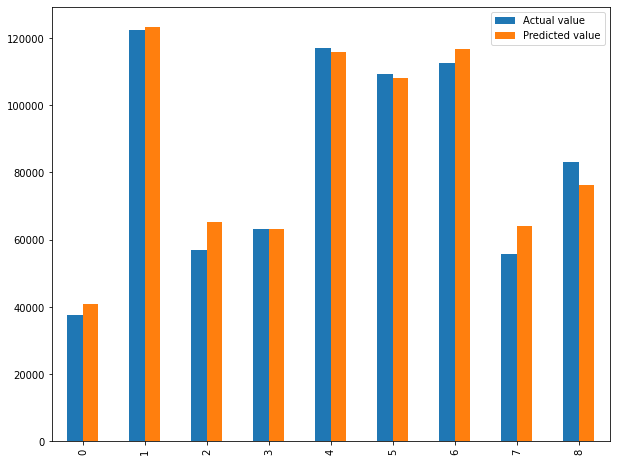

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print('Intercept',regressor.intercept_)
print('Coefficients',regressor.coef_)

comparision_linear = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
print(comparision_linear)

df = comparision_linear.head(30)
df.plot(kind = 'bar',figsize = (10,8))

from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Score:', metrics.r2_score(y_test, y_pred))

   Actual value  Predicted value
0       37731.0     41323.419031
1      122391.0    124124.638079
2       57081.0     64867.897778
3       63218.0     63029.403846
4      116969.0    116232.185431
5      109431.0    108412.746603
6      112635.0    117214.749069
7       55794.0     63948.080391
8       83088.0     75994.692008
Mean Absolute Error (MAE): 3875.9729399528896
Mean Squared Error (MSE): 23993355.945680752
Root Mean Squared Error (RMSE): 4898.301332674497
R^2 Score: 0.9734085733044994


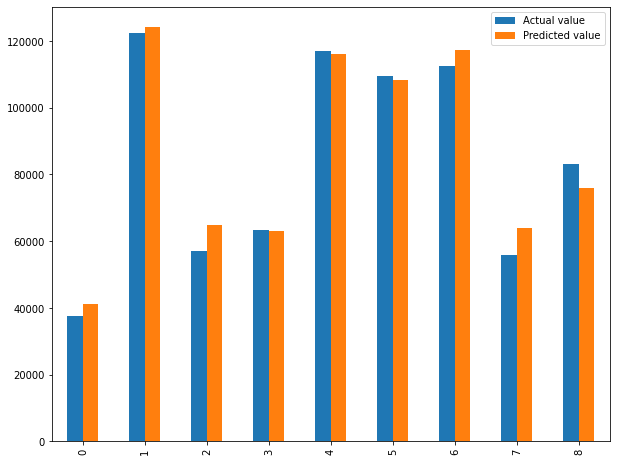

In [20]:
from sklearn.preprocessing import PolynomialFeatures
regressor1 = PolynomialFeatures(degree = 2)
X_poly = regressor1.fit_transform (X_train)
regressor.fit(X_poly, y_train)

y_pred1 = regressor.predict(regressor1.transform(X_test))

comparision_poly = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred1})
print(comparision_poly)

df1 = comparision_poly.head(30)
df1.plot(kind = 'bar',figsize = (10,8))

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print('R^2 Score:', metrics.r2_score(y_test, y_pred1))

   Actual value  Predicted value
0       37731.0     64511.575231
1      122391.0     64908.650816
2       57081.0     64440.869137
3       63218.0     64441.169776
4      116969.0     64687.696579
5      109431.0     64556.107995
6      112635.0     64709.793583
7       55794.0     64440.994133
8       83088.0     64440.684016
Mean Absolute Error (MAE): 29469.075031938657
Mean Squared Error (MSE): 1282610269.5967863
Root Mean Squared Error (RMSE): 35813.54868756776
R^2 Score: -0.42149506055317065


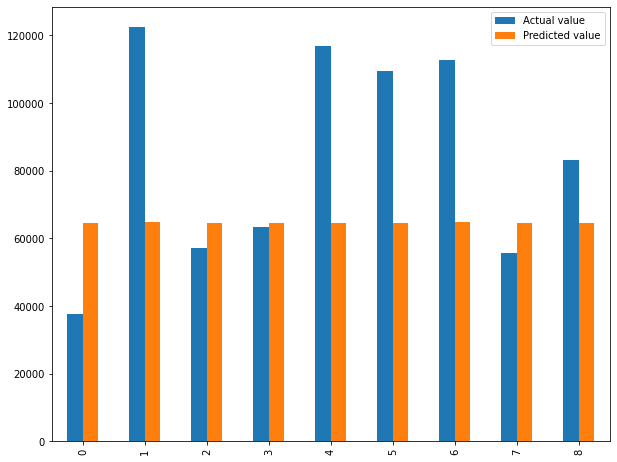

In [21]:
from sklearn.svm import SVR
regressor2 = SVR(kernel = 'poly', degree=4)
regressor2.fit(X_train, y_train)

y_pred2 = regressor2.predict(X_test)

comparision_svr = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred2})
print(comparision_svr)

df2 = comparision_svr.head(30)
df2.plot(kind = 'bar',figsize = (10,8))

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print('R^2 Score:', metrics.r2_score(y_test, y_pred2))

   Actual value  Predicted value
0       37731.0     64444.581552
1      122391.0     64454.405268
2       57081.0     64447.858572
3       63218.0     64447.100504
4      116969.0     64455.575670
5      109431.0     64456.669275
6      112635.0     64455.428525
7       55794.0     64447.472791
8       83088.0     64452.853905
Mean Absolute Error (MAE): 29578.00897510285
Mean Squared Error (MSE): 1294424252.1802988
Root Mean Squared Error (RMSE): 35978.107957205015
R^2 Score: -0.434588295720548


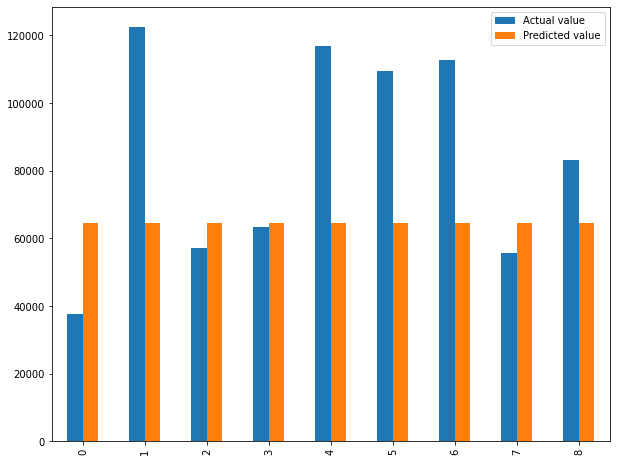

In [22]:
regressor_2 = SVR(kernel = 'rbf')
regressor_2.fit(X_train, y_train)

y_pred_2 = regressor_2.predict(X_test)

comparision_svr_ = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_2})
print(comparision_svr_)

df_2 = comparision_svr_.head(30)
df_2.plot(kind = 'bar',figsize = (10,8))

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred_2))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred_2))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_2)))
print('R^2 Score:', metrics.r2_score(y_test, y_pred_2))

   Actual value  Predicted value
0       37731.0     43207.000000
1      122391.0    121872.000000
2       57081.0     58705.571429
3       63218.0     58705.571429
4      116969.0    109697.000000
5      109431.0    109697.000000
6      112635.0    109697.000000
7       55794.0     58705.571429
8       83088.0     66983.500000
Mean Absolute Error (MAE): 4624.896825396825
Mean Squared Error (MSE): 42519325.93027211
Root Mean Squared Error (RMSE): 6520.684467927589
R^2 Score: 0.9528765571112003


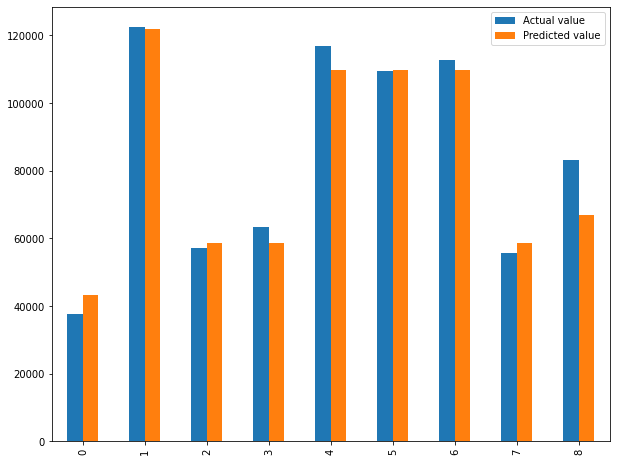

In [23]:
from sklearn.tree import DecisionTreeRegressor
regressor4 = DecisionTreeRegressor(max_depth=3, random_state=0)
regressor4.fit(X_train, y_train)

y_pred4 = regressor4.predict(X_test)

comparision_dt = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred4})
print(comparision_dt)

df4 = comparision_dt.head(30)
df4.plot(kind = 'bar',figsize = (10,8))

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred4))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred4))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))
print('R^2 Score:', metrics.r2_score(y_test, y_pred4))

   Actual value  Predicted value
0       37731.0     44912.500000
1      122391.0    116042.000000
2       57081.0     58992.411111
3       63218.0     57532.711111
4      116969.0    110612.000000
5      109431.0    106861.400000
6      112635.0    110612.000000
7       55794.0     57532.711111
8       83088.0     68782.666667
Mean Absolute Error (MAE): 5346.760493827162
Mean Squared Error (MSE): 42959138.41127571
Root Mean Squared Error (RMSE): 6554.322116838301
R^2 Score: 0.9523891204485321


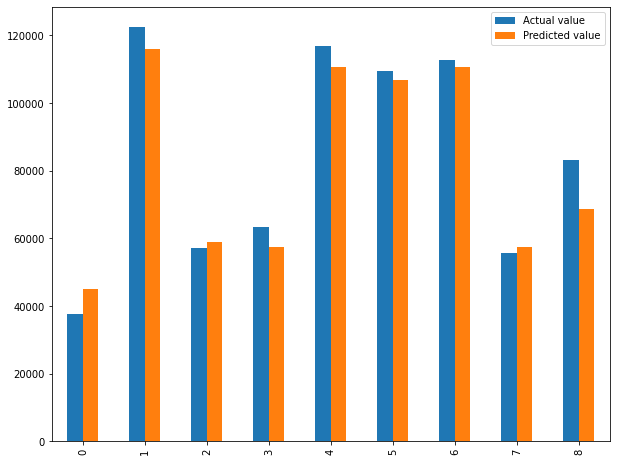

In [24]:
from sklearn.ensemble import RandomForestRegressor
regressor3 = RandomForestRegressor(n_estimators=30, max_depth = 7, random_state = 0)
regressor3.fit(X_train, y_train)

y_pred3 = regressor3.predict(X_test)

comparision_rf = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred3})
print(comparision_rf)

df3 = comparision_rf.head(30)
df3.plot(kind = 'bar',figsize = (10,8))

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred3))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
print('R^2 Score:', metrics.r2_score(y_test, y_pred3))

   Actual value  Predicted value
0       37731.0          39343.0
1      122391.0         121872.0
2       57081.0          64445.0
3       63218.0          56642.0
4      116969.0         121872.0
5      109431.0         121872.0
6      112635.0         121872.0
7       55794.0          60150.0
8       83088.0          81363.0
Mean Absolute Error (MAE): 5414.777777777777
Mean Squared Error (MSE): 42936733.0
Root Mean Squared Error (RMSE): 6552.612685028774
R^2 Score: 0.9524139519832648


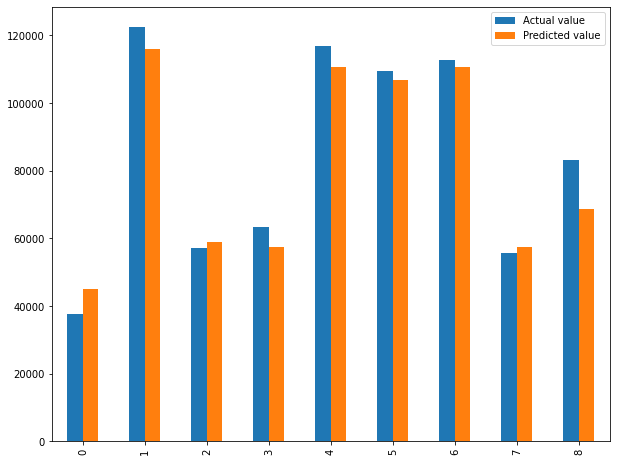

In [25]:
from sklearn.linear_model import LogisticRegression
regressor4 = LogisticRegression(random_state = 0)
regressor4.fit(X_train, y_train)

y_pred4 = regressor4.predict(X_test)

comparision_logreg = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred4})
print(comparision_logreg)

df4 = comparision_rf.head(30)
df4.plot(kind = 'bar',figsize = (10,8))

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred4))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred4))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))
print('R^2 Score:', metrics.r2_score(y_test, y_pred4))

   Actual value  Predicted value
0       37731.0     42256.264983
1      122391.0    120882.459787
2       57081.0     65486.731630
3       63218.0     63699.772657
4      116969.0    113734.623896
5      109431.0    106586.788005
6      112635.0    114628.103382
7       55794.0     64593.252144
8       83088.0     76208.485467
Mean Absolute Error (MAE): 4296.863071261705
Mean Squared Error (MSE): 26768877.34623702
Root Mean Squared Error (RMSE): 5173.864836487035
R^2 Score: 0.9703325103297419


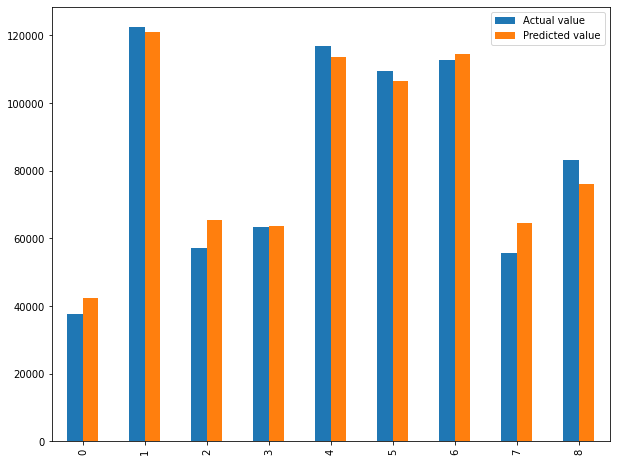

In [26]:
from sklearn.linear_model import Ridge
regressor5 = Ridge()
regressor5.fit(X_train, y_train)

y_pred5 = regressor5.predict(X_test)

comparision_ridge = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred5})
print(comparision_ridge)

df5 = comparision_ridge.head(30)
df5.plot(kind = 'bar',figsize = (10,8))

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred5))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred5))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))
print('R^2 Score:', metrics.r2_score(y_test, y_pred5))

   Actual value  Predicted value
0       37731.0     40819.103827
1      122391.0    123185.965979
2       57081.0     65154.767644
3       63218.0     63282.793505
4      116969.0    115698.069420
5      109431.0    108210.172861
6      112635.0    116634.056490
7       55794.0     64218.780575
8       83088.0     76386.612483
Mean Absolute Error (MAE): 3737.6236950276507
Mean Squared Error (MSE): 23371326.328357305
Root Mean Squared Error (RMSE): 4834.3899644481835
R^2 Score: 0.974097958107898


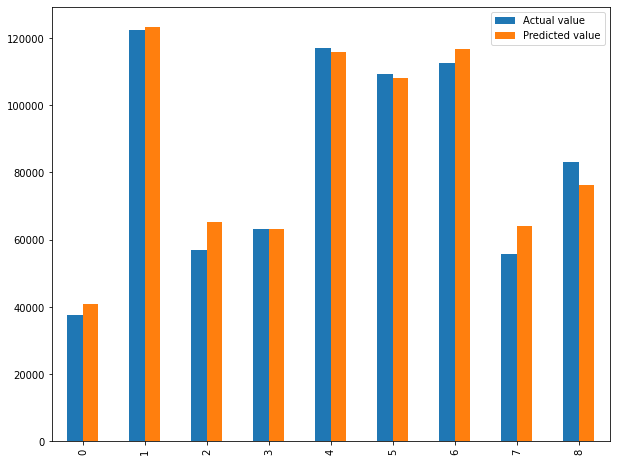

In [27]:
from sklearn.linear_model import Lasso
regressor6 = Lasso()
regressor6.fit(X_train, y_train)

y_pred6 = regressor6.predict(X_test)

comparision_lasso = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred6})
print(comparision_lasso)

df6 = comparision_lasso.head(30)
df6.plot(kind = 'bar',figsize = (10,8))

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred6))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred6))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred6)))
print('R^2 Score:', metrics.r2_score(y_test, y_pred6))